<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/03Clustering/01K-Means/kMeans01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means
## Esercizio 1
**Author: Cristiano Casadei**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

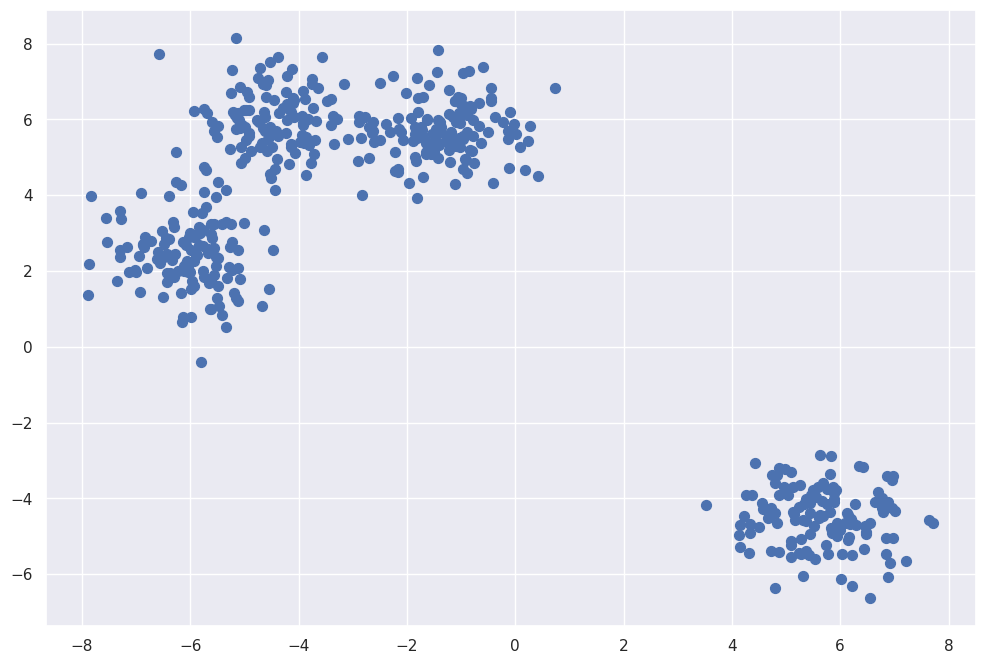

In [2]:
# imposto la grafica del background (griglia)
plt.rcParams["figure.figsize"] = (12, 8)
sns.set()

# creo un dataset casuale con 4 macroaree e un random_state fisso
# per rendere ripetibili le prove
# NOTA: scarto i valori target (y) perchè il clustering è uno strumento "unsupervised"
# Quindi, nella pratica, non ho esempi da utilizzare per l'addestramento
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=1234)

# visualizzo il dataset
plt.scatter(X[:, 0], X[:, 1], s=50)

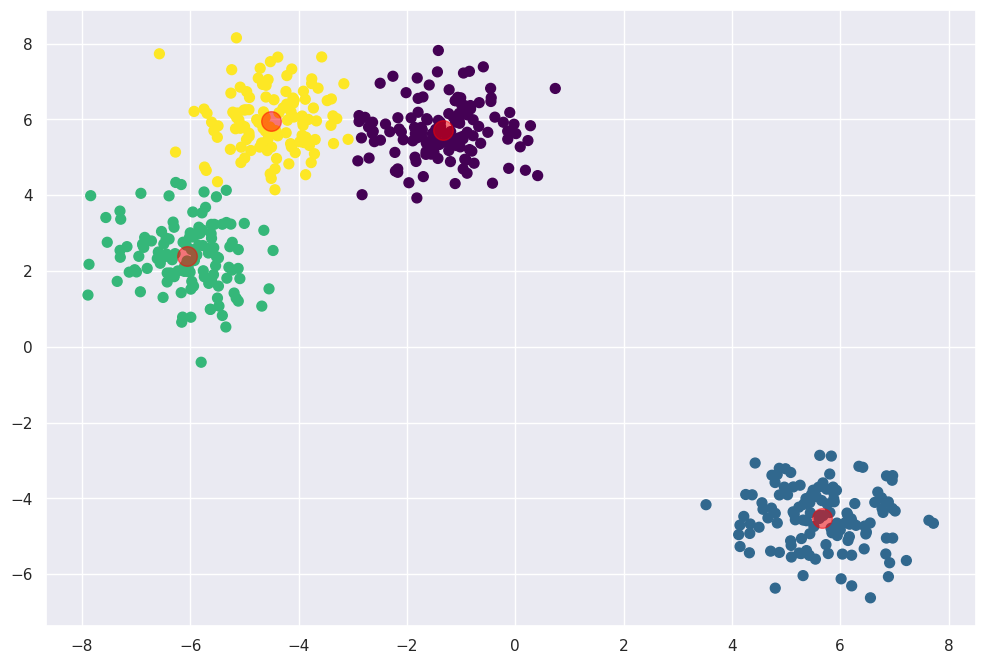

In [3]:

# istanzio la classe di gestione di K-Means e un numero di cluster pari a 4
km = KMeans(n_clusters=4)
km.fit(X)

# assegno una classe ad ogni esempio del dataset
y = km.predict(X)

# ottengo i "centroidi" dei cluster
centroids = km.cluster_centers_

# ridisegno il dataset usando un colore per ogni classe
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap="viridis")
# disegno i centroidi in rosso, semitrasparenti e con un puntino più grande di quelli degli esempi
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", alpha=0.5, s=200)

Text(0, 0.5, 'Valore di SDQ')

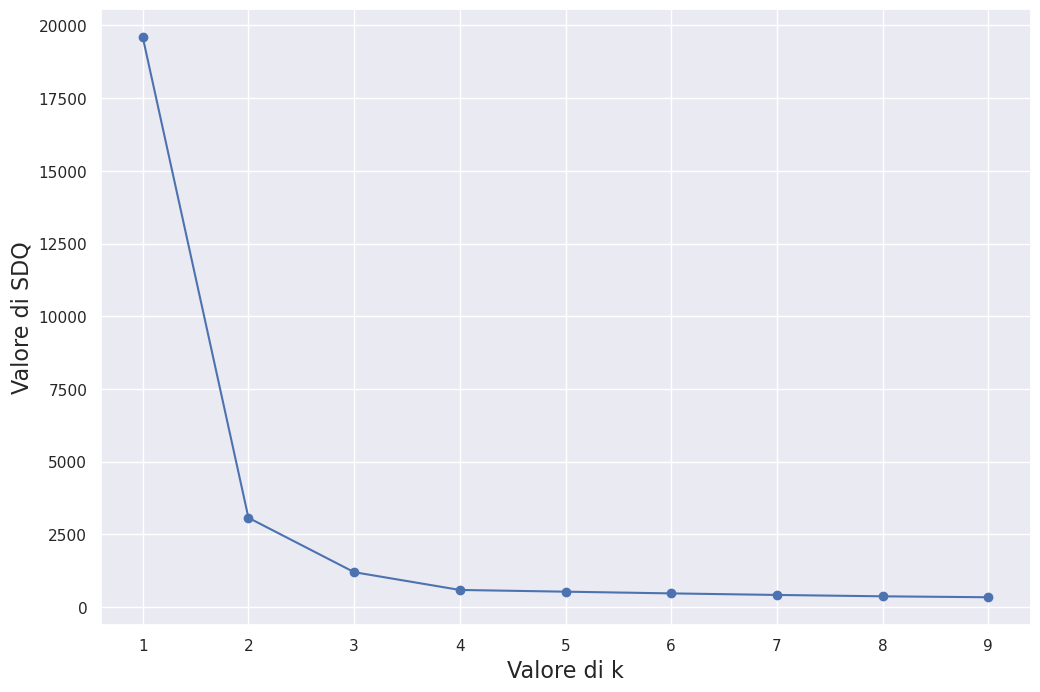

In [4]:
# verifico il numero di cluster ideali utilizzando l'elbow-method
# preparo un dizionario dove memorizzerò i valori della somma delle distanze al quadrato
# di ogni valore di K testato
sdq = {}
for k in range(1, 10):
    # istanzio la classe di gestione di K-Means e un numero di cluster pari al k attuale
    # NOTA: utilizzo l'inizializzazione "k-means++" che inizializza i centroidi
    # in modo casuale ma garantendo che non si trovino troppo vicini l'uno con l'altro,
    # per minimizzare i problemi che questo porterebbe, soprattutto con valori di K elevati
    km = KMeans(init="k-means++", n_clusters=k)
    km.fit(X)

    # per il k attuale, memorizzo il valore di ssd
    sdq[k] = km.inertia_

# visualizzo i valori di sqd per ogni k
plt.plot(list(sdq.keys()), list(sdq.values()), marker="o")
plt.xlabel("Valore di k", fontsize=16)
plt.ylabel("Valore di SDQ", fontsize=16)